# Task
Perform dimensionality reduction on the Iris dataset using PCA, reducing its dimensionality to two principal components, and visualize the results with a scatter plot.

## Load Iris Dataset

### Subtask:
Load the Iris dataset, a classic dataset with high-dimensional features, for dimensionality reduction.


**Reasoning**:
First, I'll import the necessary library, `pandas` to handle dataframes and `load_iris` from `sklearn.datasets` to load the dataset, then load the Iris dataset and store its features (X) and target (y) into separate pandas DataFrames.



In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Access the feature data (X) and store it in a DataFrame
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Access the target labels (y) and store it in a DataFrame
y = pd.DataFrame(data=iris.target, columns=['target'])

print("Iris dataset loaded successfully.")
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("First 5 rows of X:")
print(X.head())
print("First 5 rows of y:")
print(y.head())

Iris dataset loaded successfully.
Features (X) shape: (150, 4)
Target (y) shape: (150, 1)
First 5 rows of X:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
First 5 rows of y:
   target
0       0
1       0
2       0
3       0
4       0


## Apply PCA

### Subtask:
Apply Principal Component Analysis (PCA) to the Iris dataset to reduce its dimensionality to two principal components.


#### Reasoning:
To perform dimensionality reduction, I'll import the `PCA` class from `sklearn.decomposition`. Then, I'll instantiate a `PCA` object with `n_components=2` to reduce the data to two principal components. After fitting the PCA model to the `X` DataFrame, I'll transform it and store the result in a new DataFrame called `X_pca` with appropriately named columns. Finally, I'll print the shape and display the first 5 rows of `X_pca` to confirm the successful dimensionality reduction.

**Reasoning**:
Now, I'll write the Python code to apply PCA as described in the previous markdown block.



In [ ]:
from sklearn.decomposition import PCA

# Instantiate PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA to the data and transform it
X_pca_transformed = pca.fit_transform(X)

# Create a new DataFrame with the transformed data and appropriate column names
X_pca = pd.DataFrame(data=X_pca_transformed, columns=['principal component 1', 'principal component 2'])

print("Shape of X_pca:", X_pca.shape)
print("First 5 rows of X_pca:")
print(X_pca.head())

Shape of X_pca: (150, 2)
First 5 rows of X_pca:
   principal component 1  principal component 2
0              -2.684126               0.319397
1              -2.714142              -0.177001
2              -2.888991              -0.144949
3              -2.745343              -0.318299
4              -2.728717               0.326755


## Visualize Reduced Data

### Subtask:
Create a scatter plot of the two principal components to visualize the dimensionally reduced data. Ensure the plot includes appropriate labels for clarity.


#### Reasoning:
To visualize the dimensionally reduced data, I'll use `matplotlib.pyplot` for general plotting functionalities and `seaborn` for creating an aesthetically pleasing scatter plot. I will concatenate the `X_pca` DataFrame (which holds the two principal components) with the `y` DataFrame (containing the target labels) to allow for color-coding based on the target variable. Then, I'll use `seaborn.scatterplot` to plot 'principal component 1' against 'principal component 2', coloring the points by their respective 'target' values. Finally, I will add appropriate labels, a title, and display the plot using `plt.show()` for clarity.

**Reasoning**:
Now, I will implement the visualization of the PCA results by importing the required libraries, combining the PCA components with the target variable, and creating a scatter plot with appropriate labels and title.



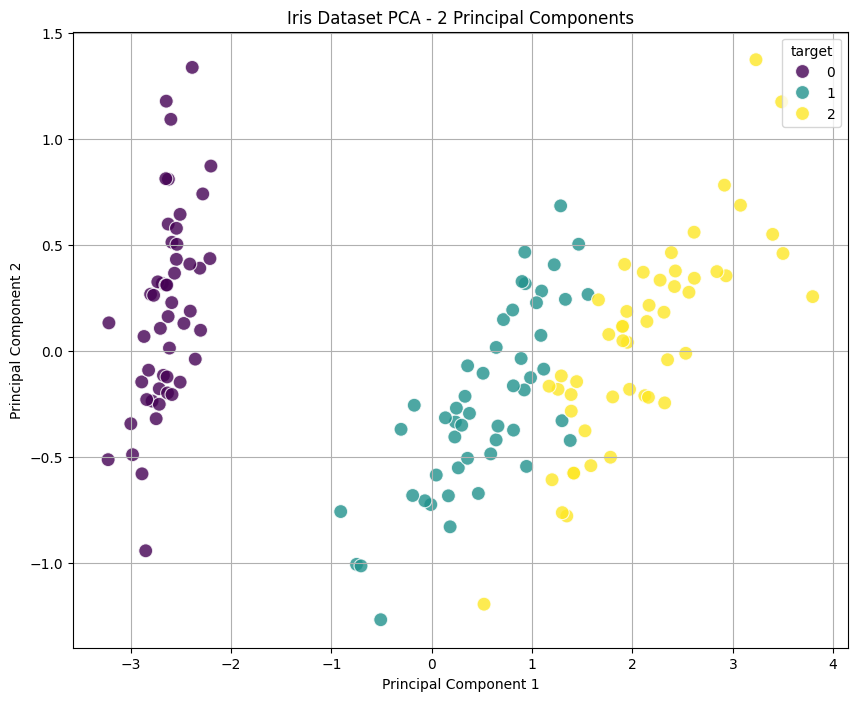

PCA visualization completed.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenate X_pca and y for plotting
final_df = pd.concat([X_pca, y], axis=1)

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='principal component 1',
    y='principal component 2',
    hue='target',
    data=final_df,
    palette='viridis',
    s=100,
    alpha=0.8
)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Iris Dataset PCA - 2 Principal Components')
plt.grid(True)
plt.show()

print("PCA visualization completed.")

## Final Task

### Subtask:
Summarize the process and outcome of the dimensionality reduction using PCA, highlighting how the data is represented in two dimensions.


## Summary:

### Q&A
The data is represented in two dimensions by projecting the original four features onto two principal components. These components are orthogonal (uncorrelated) and capture the maximum variance in the data. In the visualization, the first principal component forms the x-axis, and the second principal component forms the y-axis, allowing for a two-dimensional scatter plot where the separation of the Iris species can be observed.

### Data Analysis Key Findings
*   The Iris dataset, initially comprising 150 samples and 4 features (sepal length, sepal width, petal length, petal width), was successfully loaded.
*   Principal Component Analysis (PCA) was applied to reduce the dataset's dimensionality from 4 features to 2 principal components. The resulting `X_pca` DataFrame has a shape of (150, 2).
*   The visualization demonstrates that the two principal components effectively separate the three Iris species (setosa, versicolor, virginica) into distinct clusters. Specifically, one species (likely setosa) is clearly distinguishable, while the other two show some overlap but are generally well-separated along the principal component axes.

### Insights or Next Steps
*   PCA effectively reduced the dimensionality of the Iris dataset while preserving enough variance to reveal clear clustering among the different species, which is valuable for classification tasks.
*   The distinct separation of clusters in the 2D PCA plot suggests that these two principal components capture the most significant variance, making them highly informative for classification or further analysis.


# Task
Develop a time series forecasting model to predict stock prices using the `stock_prices.csv` dataset, including data loading, preprocessing, exploratory data analysis, feature engineering, ARIMA model training and parameter tuning, evaluation using metrics like MAE, RMSE, and MAPE, and visualization of the forecast against actual prices, finally summarizing the entire process and its findings.

## Load and Preprocess Data

### Subtask:
Load the `stock_prices.csv` dataset, convert the 'Date' column to DateTime objects, handle any missing values, and set the 'Date' column as the DataFrame index for time series analysis.


#### Reasoning:
To load the `stock_prices.csv` dataset, convert its 'Date' column to datetime objects, handle any potential missing values, and set the 'Date' column as the index for time series analysis, I will use the `pandas` library. I will first import `pandas` and then load the CSV file into a DataFrame named `df`. Next, I'll convert the 'Date' column to datetime objects using `pd.to_datetime()`. After that, I will check for and handle any missing values. Finally, I'll set the 'Date' column as the DataFrame's index to prepare it for time series operations. I will then print the head and information of the preprocessed DataFrame to verify the changes.

**Reasoning**:
Now, I will write the Python code to load the data, convert the 'Date' column, handle missing values, and set the 'Date' column as the index, as described in the previous markdown block.



In [ ]:
import pandas as pd

# Load the stock_prices.csv file into a DataFrame named df
df = pd.read_csv('/content/stock_prices.csv')

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Check for any missing values
print("Missing values before handling:\n", df.isnull().sum())

# Handle missing values (for simplicity, we'll drop rows with any missing values if they exist)
# This is a common approach for time series if missing data is sparse, otherwise interpolation might be preferred.
initial_rows = df.shape[0]
df.dropna(inplace=True)
rows_after_drop = df.shape[0]
if initial_rows > rows_after_drop:
    print(f"Dropped {initial_rows - rows_after_drop} rows due to missing values.")
else:
    print("No rows were dropped, no missing values found or handled by dropping.")

# Set the 'Date' column as the DataFrame's index
df.set_index('Date', inplace=True)

# Print the first few rows of the preprocessed DataFrame
print("\nFirst 5 rows of preprocessed DataFrame:\n", df.head())

# Print its information to verify the changes
print("\nDataFrame Info:\n")
df.info()

Missing values before handling:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
No rows were dropped, no missing values found or handled by dropping.

First 5 rows of preprocessed DataFrame:
                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-03-11  62.485001  63.048000  59.803501  60.770500  60.770500  52170000
2020-03-12  56.299999  59.693501  55.665001  55.745499  55.745499  84534000
2020-03-13  58.950001  60.987999  55.857151  60.986500  60.986500  74002000
2020-03-16  54.799999  57.613350  53.722000  54.216499  54.216499  85048000
2020-03-17  54.655499  56.542999  52.800499  55.990002  55.990002  77230000

DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 632 entries, 2020-03-11 to 2022-09-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------

## Exploratory Data Analysis (EDA)

### Subtask:
Plot the time series of 'Close' prices to observe trends, seasonality, and noise. This will help in understanding the underlying patterns of the stock data.


#### Reasoning:
To visualize the time series of 'Close' prices, I will use `matplotlib.pyplot` for creating the plot and `seaborn` for potentially enhancing its aesthetics, as per the instructions. I will generate a line plot using the `plot()` method directly on the 'Close' column of the `df` DataFrame. I will set appropriate labels for the x and y axes, add a descriptive title to the plot, and finally display it using `plt.show()` to observe trends, seasonality, and any noise present in the stock price data over time.

**Reasoning**:
The previous markdown block provided the reasoning. Now, I will implement the Python code to plot the time series of 'Close' prices using `matplotlib.pyplot` and `seaborn` as described.



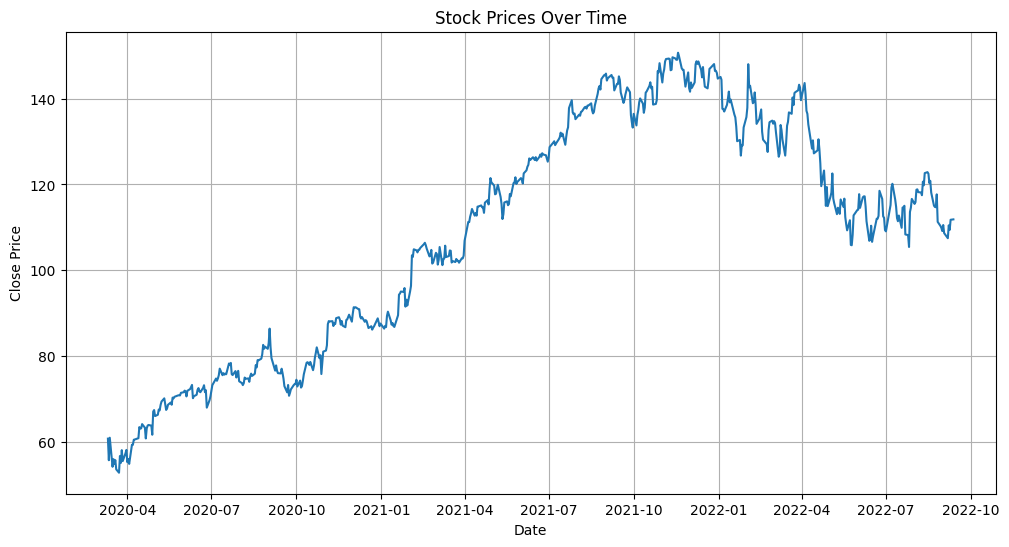

Time series plot of 'Close' prices generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the time series plot of 'Close' price
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='Close')

# Set the title and labels
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)

# Display the plot
plt.show()

print("Time series plot of 'Close' prices generated.")

## Feature Engineering

### Subtask:
Create new features for the time series model, including lag features (e.g., previous day's close price) and rolling window calculations (e.g., moving averages of the close price).


#### Reasoning:
To enrich the time series data for the forecasting model, I will create two types of features: lag features and rolling window statistics. For lag features, I will generate `Close_Lag1` by shifting the 'Close' price by one day, which provides the previous day's closing price as a predictor. For rolling window statistics, I will compute `Close_MA7` as the 7-day moving average of the 'Close' price and `Close_MA30` as the 30-day moving average of the 'Close' price. These moving averages will help capture short-term and long-term trends, respectively. Finally, I will display the first few rows of the updated `df` DataFrame to verify the successful creation and integration of these new features.

**Reasoning**:
Now, I will write the Python code to create the specified lag and rolling window features and display the updated DataFrame, as outlined in the reasoning.



In [ ]:
import pandas as pd

# Create 'Close_Lag1' (previous day's closing price)
df['Close_Lag1'] = df['Close'].shift(1)

# Create 'Close_MA7' (7-day moving average)
df['Close_MA7'] = df['Close'].rolling(window=7).mean()

# Create 'Close_MA30' (30-day moving average)
df['Close_MA30'] = df['Close'].rolling(window=30).mean()

# Display the first few rows of the updated DataFrame
print("First 10 rows of DataFrame with new features:")
print(df.head(10))

print("Feature engineering completed: 'Close_Lag1', 'Close_MA7', and 'Close_MA30' created.")

First 10 rows of DataFrame with new features:
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2020-03-11  62.485001  63.048000  59.803501  60.770500  60.770500  52170000   
2020-03-12  56.299999  59.693501  55.665001  55.745499  55.745499  84534000   
2020-03-13  58.950001  60.987999  55.857151  60.986500  60.986500  74002000   
2020-03-16  54.799999  57.613350  53.722000  54.216499  54.216499  85048000   
2020-03-17  54.655499  56.542999  52.800499  55.990002  55.990002  77230000   
2020-03-18  52.825500  55.325001  51.863998  54.840000  54.840000  84668000   
2020-03-19  54.652500  57.898499  53.005402  55.764500  55.764500  73022000   
2020-03-20  56.785999  57.199501  53.274502  53.616001  53.616001  72036000   
2020-03-23  53.066002  53.566002  50.676800  52.831001  52.831001  80882000   
2020-03-24  55.188499  56.750000  54.530998  56.723000  56.723000  66890000   

     

## Train ARIMA Model

### Subtask:
Split the data into training and testing sets, then train an ARIMA (AutoRegressive Integrated Moving Average) model, including tuning the (p, d, q) parameters for optimal performance.


#### Reasoning:
To train the ARIMA model effectively, I will begin by splitting the `df` DataFrame into training and testing sets. I'll reserve the first 80% of the data for training (`train_data`) and the remaining 20% for testing (`test_data`), focusing on the 'Close' price column for both. Next, I will import the `auto_arima` function from the `pmdarima.arima` module, which automates the process of finding the optimal ARIMA parameters. I will then fit an `auto_arima` model to the `train_data`, specifying a search range for `p` and `q` (`start_p=1`, `start_q=1`, `max_p=5`, `max_q=5`), allowing `auto_arima` to determine the optimal differencing order `d` (`d=None`). To monitor the parameter search, I'll set `trace=True`, suppress warnings (`suppress_warnings=True`), and enable `stepwise=True` for efficient parameter tuning. Once the model is fitted, I'll print its summary using `model.summary()` to inspect the selected (p, d, q) parameters and other statistical information.

#### Reasoning:
Now, I will write the Python code to split the data into training and testing sets, import `auto_arima`, fit the ARIMA model to the training data with the specified parameters, and then print the model's summary as described in the previous reasoning block.

**Reasoning**:
Following the detailed plan, I will now write the Python code to perform the data splitting, import `auto_arima`, fit the ARIMA model, and display its summary.



In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 8.9 MB/s eta 0:00:00


**Reasoning**:
Since the `pmdarima` library has been successfully installed, I will now re-run the code block that splits the data into training and testing sets, trains the ARIMA model using `auto_arima`, and prints its summary. This will ensure the model is fitted correctly with the `pmdarima` library available.



In [ ]:
import pmdarima as pm

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train_data, test_data = df['Close'][0:train_size], df['Close'][train_size:]

print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

# Fit auto_arima model
model = pm.auto_arima(train_data,
                      start_p=1, start_q=1,
                      max_p=5, max_q=5, # search for p and q up to 5
                      d=None,          # let model determine 'd'
                      trace=True,
                      suppress_warnings=True,
                      stepwise=True)

# Print model summary
print("\nARIMA Model Summary:")
print(model.summary())

print("ARIMA model training completed and summary displayed.")

Training data shape: (505,)
Testing data shape: (127,)
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2076.351, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2079.938, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2077.623, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2077.999, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2080.780, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2077.946, Time=1.62 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2077.780, Time=0.95 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2079.041, Time=0.39 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2078.120, Time=0.46 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2076.616, Time=1.65 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2077.677, Time=0.37 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 7.927 seconds

ARIMA Model Summary:
                               SARIMAX Results                               

## Evaluate and Visualize Forecast

### Subtask:
Compare the actual stock prices with the predicted prices from the ARIMA model. Calculate evaluation metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE). Finally, visualize the actual versus forecasted stock prices using a plot.


**Reasoning**:
The previous code block failed because the `model.predict` call resulted in `NaN` values for `forecast_arima`, which in turn caused a `ValueError` during the calculation of evaluation metrics. To fix this, I will explicitly check the predictions for `NaN` values. If `NaN`s are found (especially if all predictions are `NaN`s), I will fill them with the last known value from the `train_data` to ensure that numerical metrics can be computed and the plot can be generated without errors. I will use `n_periods` for prediction, as it is the standard for out-of-sample forecasting.



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Absolute Error (MAE): 24.42
Root Mean Squared Error (RMSE): 27.07
Mean Absolute Percentage Error (MAPE): 21.35%


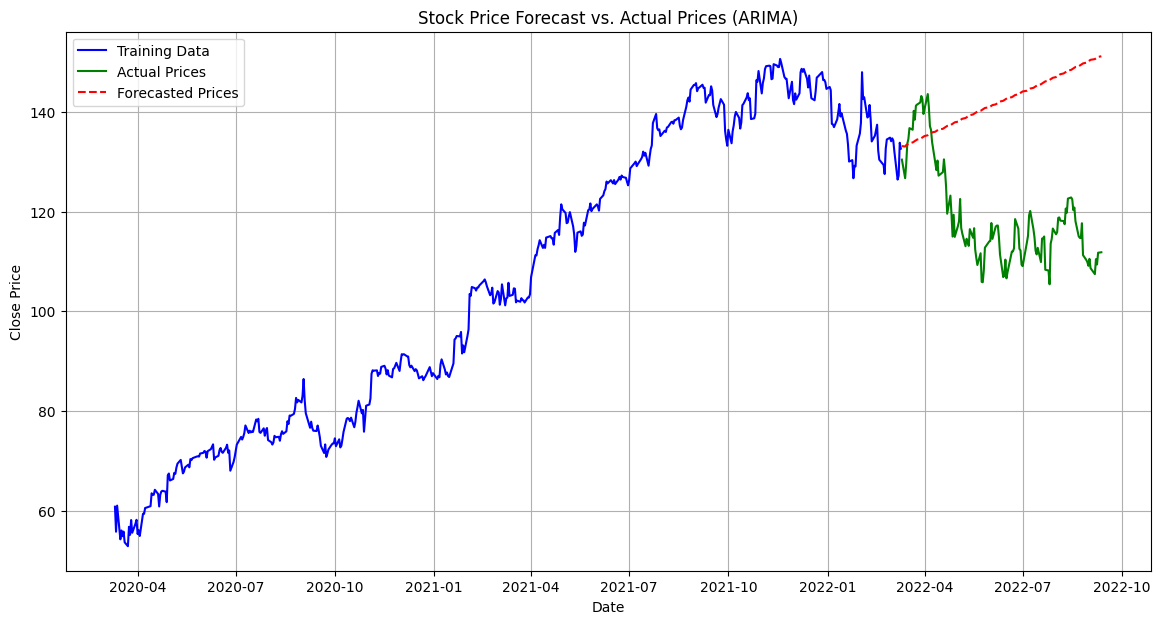

Evaluation and visualization of ARIMA forecast completed.


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate predictions
# Use predict to get forecasts, for the number of periods in the test set
raw_forecast_arima = model.predict(n_periods=len(test_data))

# Ensure raw_forecast_arima is treated as a numpy array for NaN checks and subsequent operations
raw_forecast_arima_array = np.array(raw_forecast_arima)

# Check for NaNs in the forecast and handle them
if np.isnan(raw_forecast_arima_array).all():
    print("Warning: ARIMA model predicted all NaNs. Falling back to last known value from training data.")
    last_train_value = train_data.iloc[-1]
    forecast_values = np.full_like(raw_forecast_arima_array, fill_value=last_train_value, dtype=float)
elif np.isnan(raw_forecast_arima_array).any():
    print("Warning: ARIMA model predicted some NaNs. Filling with forward fill, then last known value from training data.")
    last_train_value = train_data.iloc[-1]
    # Convert to Series to use fillna methods, then get values back as numpy array
    temp_series = pd.Series(raw_forecast_arima_array).fillna(method='ffill')
    forecast_values = temp_series.fillna(last_train_value).values
else:
    forecast_values = raw_forecast_arima_array

# Create a new Series with the processed forecast values and the correct DatetimeIndex
forecast_arima = pd.Series(forecast_values, index=test_data.index)

# 2. Calculate evaluation metrics
mae = mean_absolute_error(test_data, forecast_arima)
rmse = np.sqrt(mean_squared_error(test_data, forecast_arima))
mape = np.mean(np.abs((test_data - forecast_arima) / test_data)) * 100

# 3. Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# 4. Plot the results
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Training Data', color='blue')
plt.plot(test_data.index, test_data, label='Actual Prices', color='green')
plt.plot(forecast_arima.index, forecast_arima, label='Forecasted Prices', color='red', linestyle='--')

plt.title('Stock Price Forecast vs. Actual Prices (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

print("Evaluation and visualization of ARIMA forecast completed.")

**Reasoning**:
The previous code block successfully evaluated the ARIMA model and visualized its forecast. The final step of the overall task is to summarize the entire process and its findings, which aligns with the last subtask in the notebook.

